In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('mall.csv')

In [27]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df = df.drop(columns = ['CustomerID', 'Genre'])

In [29]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [30]:
x = df.iloc[:, [0,1]].values

In [31]:
from sklearn.cluster import KMeans

In [32]:
import matplotlib.pyplot as plt

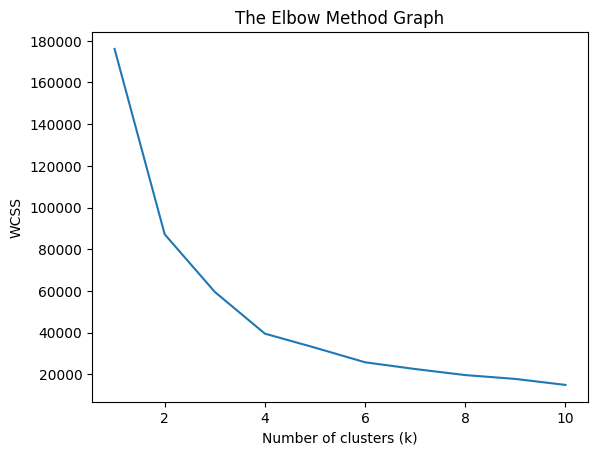

In [39]:
a = []

for i in range(1, 11):
    b = KMeans(n_clusters=i, init='k-means++', random_state=42)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1, 11), a)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')  # Changed to WCSS (Within-Cluster Sum of Squares)
plt.show()


In [34]:
# form the above plot, we can see the elbow point is at 4. So the elbow point is at 4. So the number 
# of clusters here will be 4.

In [41]:
b = KMeans(n_clusters=4, init='k-means++', random_state=42)  # Fixed "n_clusters"
y_predict = b.fit_predict(x)  # Fit and predict clusters

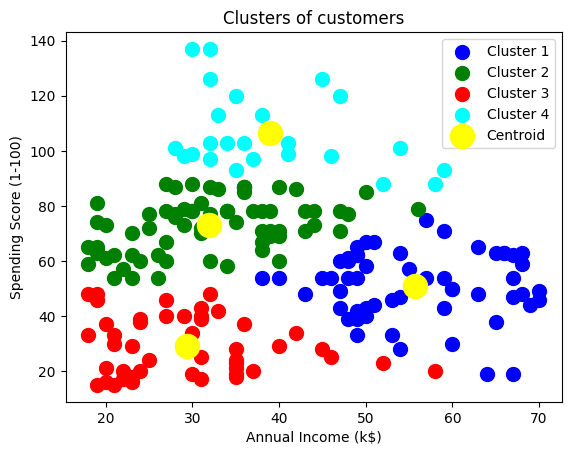

In [44]:
# Scatter plot for each cluster
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s=100, c='cyan', label='Cluster 4')  # Fixed indexing

# Scatter plot for centroids
plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')  # Fixed typo

# Labels & title
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')  # Fixed typo
plt.legend()
plt.show()
